In [29]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Step 1 
SP_df = pd.read_csv(r"StudentsPerformance.csv")
print(StudentsPerformance.head(10))
print(StudentsPerformance.dtypes)
print(StudentsPerformance.describe())
# one key observation I have about the dataset from the statistical summary is that the minimum math score was 0,
# which is probably why the average math score is less than the average math and reading, who's minimum score was >= 10

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

In [10]:
# Step 2 
# The dataset I am using for the project does not have missing values in any of the columns 
SP_df.isnull() # verifying that no values are missing from the dataset 
# following questions are thus not applicable 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


  parental level of education  math score
0          associate's degree   67.882883
1           bachelor's degree   69.389831
2                 high school   62.137755
3             master's degree   69.745763
4                some college   67.128319
5            some high school   63.497207


<Axes: >

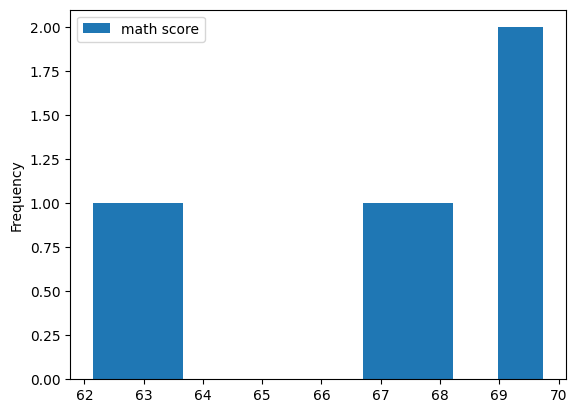

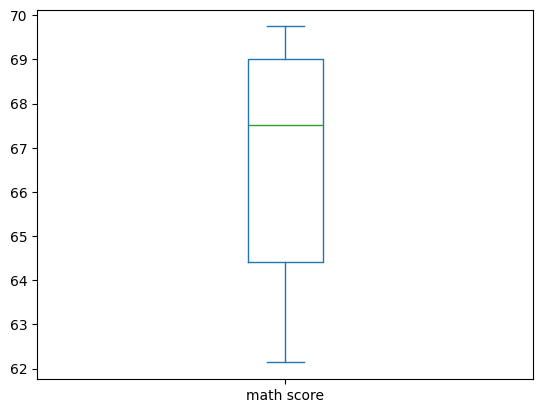

In [11]:
# Step 3 
# Math score is a quantative variable and parental level of education is qualitative
SP_df['parental level of education'].value_counts() # frequency distribution of categorical data 
SP_test = SP_df[['math score', 'parental level of education']]
SP_grp = SP_test.groupby(['parental level of education'], as_index=False).mean() # numerical summaries of quantitative variable grouped by categorirical variable
print(SP_grp)


SP_grp.plot(kind='hist')# histogram of quantitative grouped by categorical
SP_grp.plot(kind='box') # boxplot of quantitative grouped by categorical

# The group that has the highest average math score is the master's degree group 
# this is exepcted as that is the highest level of parental education included in the dataset 
# one interesting finding is that the average math score of the master's degree group is not much higher than that of the bachelor's degree group

(0.0, 104.5)

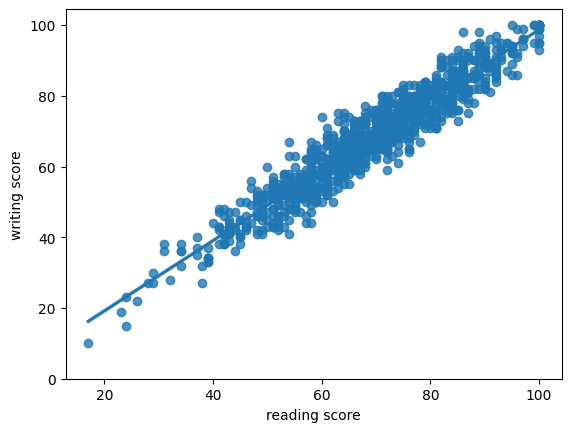

In [12]:
# Step 4 
# two quantitative variables that may be correlated are reading and writing scores
# reading and writing are related fields, so if a student scores high in one, they should score high in the other
sns.regplot(x="reading score", y ="writing score", data=SP_df)
plt.ylim(0,)
# my initial hypothesis that the two variables would be strongly correlated is correct because the graph below displays a 
# very strong positive correlation between reading and writing scores  

In [31]:

n = pd.get_dummies(SP_df['lunch'])
j = SP_df[['math score']]
n = sk.preprocessing.StandardScaler().fit(n).transform(n.astype(float)) # standardize data
n_train, n_test, j_train, j_test = train_test_split(n, j, test_size=0.2, random_state=1)
print ('Train set:', n_train.shape,  j_train.shape)
print ('Test set:', n_test.shape,  j_test.shape) # train/test split in order to improve accuracy 
k = 40
#Train Model and Predict Values
neigh = KNeighborsClassifier(n_neighbors = k).fit(n_train,j_train)
neigh
yhat = neigh.predict(n_test) 
print(yhat[0:15])
print("Train set Accuracy: ", metrics.accuracy_score(j_train, neigh.predict(n_train))) # compute test and training set accuracy 
print("Test set Accuracy: ", metrics.accuracy_score(j_test, yhat))

Train set: (800, 2) (800, 1)
Test set: (200, 2) (200, 1)
[74 74 74 74 65 74 74 65 65 65 74 74 65 65 65]
Train set Accuracy:  0.0375
Test set Accuracy:  0.02


/usr/local/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
